In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

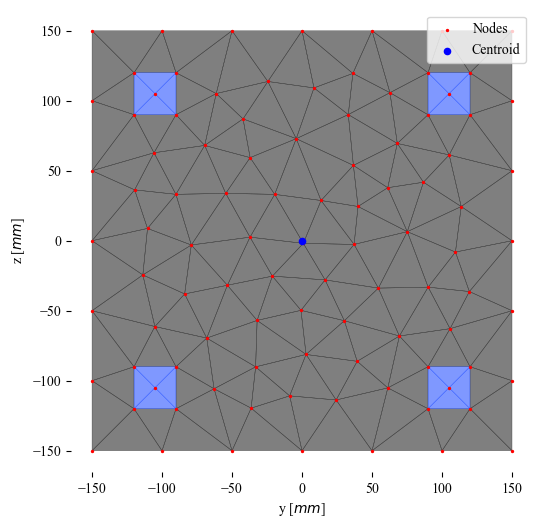

╒════════════════════╤══════════╕
│ Mesh Type          │ triangle │
├────────────────────┼──────────┤
│ Number of elements │ 168      │
├────────────────────┼──────────┤
│ Number of nodes    │ 97       │
├────────────────────┼──────────┤
│ Cross Section Area │ 90000.00 │
╘════════════════════╧══════════╛
╒═══════════════════╤══════════════╤══════════════╕
│                   │            y │            z │
╞═══════════════════╪══════════════╪══════════════╡
│ Centroid          │        -0.00 │         0.00 │
├───────────────────┼──────────────┼──────────────┤
│ Moment of inertia │ 675000000.00 │ 675000000.00 │
╘═══════════════════╧══════════════╧══════════════╛


In [2]:
ReinforcedConcrete = Simple_RC_Column(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 30)
mesh = Mesh(ReinforcedConcrete, "triangle", 50)
mesh.plot()
mesh.print()

In [3]:
struc = structure.Cantilever(beam   = mesh, 
						   	 length = 2000,
						   	 load_DOFs = [8],
						   	 nodal_loads = [1],
						   	 number_of_sections_per_elemnt = 6)

In [4]:
non_linear_solver = solver.Nonlinear(struc, 
									 constraint="Load", 
									 NR_tolerance=1e-4, 
									 NR_max_iter=20, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)

In [5]:
increments = np.zeros(100)
increments.fill(1000)

u_history , lambda_history  = non_linear_solver.solve(increments)

  0%|          | 0/100 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
      Residuals Norm  2.3283133927695464e-10
NR Converged!
----------------------------------------------
Load step 2 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
      Residuals Norm  2.3283109045317054e-10
NR Converged!
----------------------------------------------
Load step 3 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
      Residuals Norm  6.984920789913313e-10
NR Converged!
----------------------------------------------
Load step 4 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
      Residuals Norm  4.656632876564589e-10
NR Converged!
----------------------------------------------
Load step 5 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1

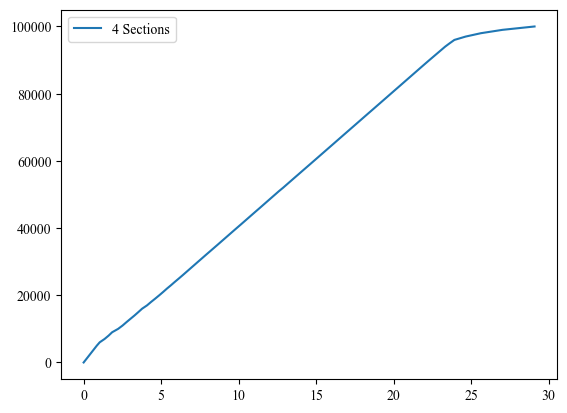

In [6]:
plt.plot(u_history[:,6+2], lambda_history, label="4 Sections")
plt.legend()
plt.show()